# PHY325 Machine learning (ML) Module

This module aims to introduce concepts relating to ML as used in many areas of modern physics research. After submitting this module you should have a basic understanding of ML, its applications, the steps required to prepare data for ML and some ML commands, primarily through Scikit. After this module please consider looking into some of the many resources online to expand your understanding of ML or PHY426: Computational Modelling in Physics which will expand on the methods used here.

First, we will import some nessassary libraries we will use throughout this module

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math as m
import scipy.stats as stats

# Basic python review

use the command "%pwd" to find your computer's directory, open the file explorer and place the data set in the directory location. If you get a message simmilar to '/home/jovyan' that means your using a server's directory, in this case U of T's. To use the data just place its file in Jupyter's home page.

In [6]:
%pwd

'C:\\Users\\tim'

Now, we wish to tell python to access the dataset using pandas' pd.read_csv(" data_frame "), where in place of data_frame you type what you have the name you have the data set under

In [7]:
#define the dataframe 
df_k = pd.read_csv ("Kidney_Data.csv")
#print the first 10 rows with .head ()
df_k.head (10)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
7,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,12 - 20
8,0,0,1.019 - 1.021,3 - 3,ckd,0,< 0,0,0,0,...,1,1,0,0,0,0,177.612 - 202.778,s1,1,12 - 20
9,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,26.6175 - 51.7832,s4,1,12 - 20


There are, as you may know, many diffrent types of data. Select our data frame and use type to find what kind of data it is. Then, select a row then an element from the dataframe and do the same

In [6]:
#type df
print (type (df_k)) #it's a dataframe
print (type (df_k["sg"])) #Series
print (type (df_k['sg'][1])) #float (the other two will be the same for all pd dataframes, but this will change with the kind of data)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'float'>


Objects like data frames can have different dimensions, like the matrixes you've seen in linear algebra. To find the size of the data frame and one of its columns with the ".shape" command. (no brackets). Knowing the shape of our data frame is significant because, for example, if we add any columns to the data frame later they must be the same length.

In [7]:
print (df_k.shape)
print (df_k["sg"].shape)

(202, 29)
(202,)


We wish to learn more about the dataset, so we seek to see what all of the columns are named

In [5]:
df_k.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

We want to rename some of the columns so they are more easy for us to understand. To do this we define a dictionary and use the rename function.

In [10]:
dict_I = {"bp (Diastolic)": "Blood_Pressure (Diastolic)", "bp limit" : "Blood_Pressure_Limit", "sg": "Specific_Gravity",
         "al" : "Albumin", "class" : "Kidney_Disease", "rbc" : "Red_Blood_Cells", "su" : "Sugar", "sc" : "serum_creatinine",
         "hemo" : "Hemoglobin"}
df_k = df_k.rename(columns = dict_I)
df_k

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


# Working with NaNs
We need to remove the NaN values to apply machine learning. To do this, we will identify the NaN values with isna() and sum() to find how many there are. Then, we will replace all the NaN values with the mean value

In [9]:
#we want to find all the NaN values in the dataset
df_k.isna().sum () #there's one for most of the rows

bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64

We now know there are mississing NaN values. In order to deside what to do with them we will first have to find what rows they are in.

In [11]:
NaN_Index = list ()
None_NaN_Index = list ()
for k in np.arange (len(df_k['pc'])):
    if df_k["Blood_Pressure (Diastolic)"].isna()[k] == True:
        NaN_Index.append (k)
    else:
        None_NaN_Index.append (k)
print (NaN_Index)
print (None_NaN_Index)

[1]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201]


Now we wish to do the same for the next four columns

In [13]:
for k in np.arange (len(df_k['pc'])): #note each column has the same length so it does not matter which one you use
    if df_k["Blood_Pressure_Limit"].isna()[k] == True:
        NaN_Index.append (k)
    else:
        None_NaN_Index.append (k)
        
for k in np.arange (len(df_k['pc'])): 
    if df_k["Specific_Gravity"].isna()[k] == True:
        NaN_Index.append (k)
    else:
        None_NaN_Index.append (k)
        
for k in np.arange (len(df_k['pc'])): 
    if df_k["Albumin"].isna()[k] == True:
        NaN_Index.append (k)
    else:
        None_NaN_Index.append (k)
        
for k in np.arange (len(df_k['pc'])): 
    if df_k["Kidney_Disease"].isna()[k] == True:
        NaN_Index.append (k)
    else:
        None_NaN_Index.append (k)
        

print (NaN_Index)#they're all one, lets remove the duplicates
list (set (NaN_Index)) #all the NaN's appear to be in the first row  #Ideally you would loop through all columns instead of typing it manually

[1, 1, 1, 1, 1, 1, 1, 1, 1]


[1]

In [14]:
'''we could also tell this just by looking at the dataframe when we use just isna, 
not isna.sum. However the above method is a more systemic way to solve the problem'''
df_k.isna() 

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_k = df_k.drop (1) #we drop the first row

In [16]:
#or you may also use dropna()
df_k = df_k.dropna()

In [17]:
df_k.isna().sum() #we cheak and we see that we removed all the NaN values

Blood_Pressure (Diastolic)    0
Blood_Pressure_Limit          0
Specific_Gravity              0
Albumin                       0
Kidney_Disease                0
Red_Blood_Cells               0
Sugar                         0
pc                            0
pcc                           0
ba                            0
bgr                           0
bu                            0
sod                           0
serum_creatinine              0
pot                           0
Hemoglobin                    0
pcv                           0
rbcc                          0
wbcc                          0
htn                           0
dm                            0
cad                           0
appet                         0
pe                            0
ane                           0
grf                           0
stage                         0
affected                      0
age                           0
dtype: int64

# Working with duplicates
Next, we may experiment with dealing with duplicate columns. To do so, we will first duplicate each column and save them to a new data frame.

In [18]:
Kidney_duplicated = pd.concat([df_k]*2, ignore_index=True)

#Now cheak the size of the new dataframe

print ( Kidney_duplicated.shape)
print (df_k.shape) #we can see its twice the size of the inital dataframe

(402, 29)
(201, 29)


In [19]:
#We now use the command duplicate () to see if a row of the dataframe is duplicated
print (df_k.duplicated ())
print (df_k.duplicated ().sum()) #there's no duplicates in the inital dataframe

0      False
2      False
3      False
4      False
5      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 201, dtype: bool
0


In [20]:
print (Kidney_duplicated.duplicated ())
print (Kidney_duplicated.duplicated ().sum()) #there's 201 coppied rows in the new dataframe

0      False
1      False
2      False
3      False
4      False
       ...  
397     True
398     True
399     True
400     True
401     True
Length: 402, dtype: bool
201


Having found the duplicated rows and now we will remove them. There are many methods to do this but we will use the drop_duplicates. This may seem odd since we just added them but if you ever find any unexpected duplicates it will be helpful to know how to deal with them.

In [21]:
Kidney_duplicated

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
4,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
398,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
399,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
400,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [18]:
Kidney_duplicated = Kidney_duplicated.drop_duplicates ()
Kidney_duplicated.duplicated ().sum () #there's no more duplicates

0

# Recodeing
We are now going to recode all of the columns into catagorical data, ones and zeros only

In [22]:
df_k.columns #we first look at the names of the columns which we must recode

Index(['Blood_Pressure (Diastolic)', 'Blood_Pressure_Limit',
       'Specific_Gravity', 'Albumin', 'Kidney_Disease', 'Red_Blood_Cells',
       'Sugar', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'serum_creatinine',
       'pot', 'Hemoglobin', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'grf', 'stage', 'affected', 'age'],
      dtype='object')

In [25]:
#lets recode Kidney_Disease
map_k_inv = { 1 : "ckd", 0 : "notckd"}
map_k = { "ckd" : 1, "notckd" : 0}

df_k["Kidney_Disease"] = df_k["Kidney_Disease"].replace (map_k)
df_k["Kidney_Disease"]

0      discrete
2             1
3             1
4             1
5             1
         ...   
197           1
198           1
199           0
200           0
201           1
Name: Kidney_Disease, Length: 201, dtype: object

In [24]:
#we can also go the other way with our map (hence the inverse map), this may be inportant for understanding our data and our conclutions
df_k["Kidney_Disease"] = df_k["Kidney_Disease"].replace (map_k_inv)
df_k["Kidney_Disease"]
#you can run the above column again to get the coded column back such that it can be used in the regression

0      discrete
2           ckd
3           ckd
4           ckd
5           ckd
         ...   
197         ckd
198         ckd
199      notckd
200      notckd
201         ckd
Name: Kidney_Disease, Length: 201, dtype: object

In [26]:
#we can also see how many instances of each kind of data point in the kidney disease column
print (df_k["Kidney_Disease"].value_counts ()) #128 with and 72 without

Kidney_Disease
1           128
0            72
discrete      1
Name: count, dtype: int64


In [27]:
for l in np.arange(len(df_k.columns)):
    dict_map = {}
    for k in np.arange (len(df_k[df_k.columns [l]].unique())):
        dict_map.update({df_k[df_k.columns [l]].unique()[k] : np.arange(len(df_k[df_k.columns [l]].unique()))[k]})
    df_k[df_k.columns [l]] = df_k[df_k.columns [l]].replace(dict_map)
        

In [28]:
#we want to drop the first first row too as it just says what type of data there is
df_k = df_k.drop (0)
df_k #we can see we're missing rows one and zero so we will recet the index to fix this problem

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,2,3,1,2,1,2,1,2,...,1,1,1,2,1,1,2,1,1,1
5,2,2,2,4,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
6,1,1,3,2,1,1,1,1,1,1,...,1,2,1,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2,3,1,2,1,1,1,1,1,1,...,2,2,1,1,1,2,5,3,1,10
198,1,1,1,2,1,1,1,1,1,1,...,1,2,1,1,1,2,10,2,1,10
199,2,2,4,2,2,1,1,1,1,1,...,1,1,1,1,1,1,6,4,2,10
200,2,2,4,2,2,1,1,1,1,1,...,1,1,1,1,1,1,3,1,2,10


In [29]:
#Now we will reset the index
df_k.reset_index (inplace = True, drop = True)
df_k #fixed

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,2,3,1,2,1,2,1,2,...,1,1,1,2,1,1,2,1,1,1
3,2,2,2,4,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
4,1,1,3,2,1,1,1,1,1,1,...,1,2,1,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,3,1,2,1,1,1,1,1,1,...,2,2,1,1,1,2,5,3,1,10
196,1,1,1,2,1,1,1,1,1,1,...,1,2,1,1,1,2,10,2,1,10
197,2,2,4,2,2,1,1,1,1,1,...,1,1,1,1,1,1,6,4,2,10
198,2,2,4,2,2,1,1,1,1,1,...,1,1,1,1,1,1,3,1,2,10


In [30]:
pd.set_option('display.max_columns', None) #used to get all columns
df_k.head(10)

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Kidney_Disease,Red_Blood_Cells,Sugar,pc,pcc,ba,bgr,bu,sod,serum_creatinine,pot,Hemoglobin,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,2,3,1,2,1,2,1,2,1,2,2,1,1,2,2,1,3,1,1,1,2,1,1,2,1,1,1
3,2,2,2,4,1,1,1,1,1,1,2,1,2,1,1,3,3,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,3,2,1,1,1,1,1,1,3,1,2,1,1,3,4,2,1,1,2,1,2,2,1,2,1,1,2
5,2,2,4,2,2,1,1,1,1,1,1,1,2,1,1,4,5,2,4,1,1,1,1,1,1,3,1,2,2
6,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,5,2,3,1,2,2,1,1,1,1,4,1,1,2
7,1,1,1,2,1,1,1,1,1,1,2,2,2,1,1,1,4,1,4,1,1,1,1,1,1,5,2,1,2
8,1,1,4,2,2,1,1,1,1,1,2,2,2,1,1,3,4,2,5,1,1,1,1,1,1,5,2,2,3
9,2,3,2,3,1,1,1,2,2,2,1,1,3,1,1,6,6,4,2,1,1,1,1,1,2,6,3,1,3


# Using ML
Now that the data is prepared we can start to ___split___ it into x and y data

Now that we have done some work with this dataset, we will experiment with some ML techniques. First, we will use Logistic Regression. To do this we will split the data into test and train data as well as into x and y or input and output data as well as into test and train data.

In [27]:
#first we slect the y data
Y = df_k["Kidney_Disease"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: Kidney_Disease, Length: 200, dtype: int32

In [28]:
#now select the x
X =  [df_k["Blood_Pressure (Diastolic)"],  df_k["Blood_Pressure_Limit"],  df_k["Specific_Gravity"] ,  df_k["Albumin"] , df_k["Red_Blood_Cells"],
     df_k["Sugar"],df_k["pc"],df_k["pcc"],df_k["ba"],df_k["bgr"]
     ,df_k["bu"],df_k["sod"],df_k["serum_creatinine"],df_k["pot"],df_k["Hemoglobin"]
     ,df_k["pcv"],df_k["rbcc"],df_k["wbcc"],df_k["htn"],df_k["dm"],
     df_k["cad"],df_k["appet"],df_k["pe"],df_k["ane"],
     df_k["grf"],df_k["stage"],df_k["affected"],df_k["age"]]
X = pd.DataFrame (X)
X = X.transpose ()
print (type (X))
X

<class 'pandas.core.frame.DataFrame'>


,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Red_Blood_Cells,Sugar,pc,pcc,ba,bgr,bu,sod,serum_creatinine,pot,Hemoglobin,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,2,3,2,1,2,1,2,1,2,2,1,1,2,2,1,3,1,1,1,2,1,1,2,1,1,1
3,2,2,2,4,1,1,1,1,1,2,1,2,1,1,3,3,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,3,2,1,1,1,1,1,3,1,2,1,1,3,4,2,1,1,2,1,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,3,1,2,1,1,1,1,1,3,1,1,1,1,2,2,1,1,2,2,1,1,1,2,5,3,1,10
196,1,1,1,2,1,1,1,1,1,2,2,2,1,1,6,6,1,1,1,2,1,1,1,2,10,2,1,10
197,2,2,4,2,1,1,1,1,1,1,1,4,1,1,8,4,5,1,1,1,1,1,1,1,6,4,2,10
198,2,2,4,2,1,1,1,1,1,2,1,1,1,1,3,7,1,4,1,1,1,1,1,1,3,1,2,10


In [29]:
#or
X_II = df_k
del X_II["Kidney_Disease"] #take the inital dataframe and remove the one Y columns we want
X_II #works

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Red_Blood_Cells,Sugar,pc,pcc,ba,bgr,bu,sod,serum_creatinine,pot,Hemoglobin,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,2,3,2,1,2,1,2,1,2,2,1,1,2,2,1,3,1,1,1,2,1,1,2,1,1,1
3,2,2,2,4,1,1,1,1,1,2,1,2,1,1,3,3,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,3,2,1,1,1,1,1,3,1,2,1,1,3,4,2,1,1,2,1,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,3,1,2,1,1,1,1,1,3,1,1,1,1,2,2,1,1,2,2,1,1,1,2,5,3,1,10
196,1,1,1,2,1,1,1,1,1,2,2,2,1,1,6,6,1,1,1,2,1,1,1,2,10,2,1,10
197,2,2,4,2,1,1,1,1,1,1,1,4,1,1,8,4,5,1,1,1,1,1,1,1,6,4,2,10
198,2,2,4,2,1,1,1,1,1,2,1,1,1,1,3,7,1,4,1,1,1,1,1,1,3,1,2,10


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

In [31]:
encoded_labels = encoder.fit_transform (Y) 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_test, X_train = train_test_split (X, test_size = 0.2,random_state = 1) #80/20 split, randomize with seed 1

In [34]:
Y_test, Y_train = train_test_split (encoded_labels, test_size = 0.2,random_state = 1) #80/20 split, randomize with seed 1

Later, try to use diffrent training splits and see the results on the accuracy

In [46]:
from sklearn.linear_model import LogisticRegression #gives us logistic regression itself
from sklearn.metrics import accuracy_score#will let us test the modle's accuracy

In [36]:
clf = LogisticRegression(random_state=0) #initalize
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [37]:
Y_pred = clf.predict(X_test)

In [38]:
acc = accuracy_score(Y_test, Y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 93.125


In [39]:
made_up_data = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
new_predict = clf.predict (made_up_data)
new_predict #with our novel input we see what our model predicts

C:\Users\tim\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)

If we run with a diffrent split we can see diffrent results

In [40]:
X_test, X_train = train_test_split (X, test_size = 0.3,random_state = 1) #70/30 split, randomize with seed 1
Y_test, Y_train = train_test_split (encoded_labels, test_size = 0.3,random_state = 1) #70/30 split, randomize with seed 1

In [41]:
clf = LogisticRegression(random_state=0) #initalize
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [42]:
Y_pred = clf.predict(X_test)

In [43]:
acc = accuracy_score(Y_test, Y_pred)  #with the larger test size we get a greater accuracy in this case
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 93.57142857142857


# Round Two
before we used a map to code everything, now we will use a diffrent method called OneHotEncoding. This is useful for data that is not ranked (nominal) as opposed to ranked data (ordinal). ML programs often interprate a numbered system (1,2,3 ... as we used before) as where higher numbers are prefered, which is not really the case here. OneHoteEncoding will solve this problem.

In [10]:
#let's reload the dataset
df_k_II = pd.read_csv ("Kidney_Data.csv")
df_k_II = df_k_II.drop (0)
df_k_II = df_k_II.drop (1)#drops the NaNs and the description rows
df_k_II.reset_index (inplace = True, drop = True) #fixes the index
df_k_II 

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
196,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
197,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
198,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74


In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

In [13]:
df_k_II["sg"].unique ()

array(['1.019 - 1.021', '1.009 - 1.011', '1.015 - 1.017', '≥ 1.023',
       '< 1.007'], dtype=object)

In [33]:
#we will do the y data the same as before
#lets recode Kidney_Disease
map_k_inv = { 1 : "ckd", 0 : "notckd"}
map_k = { "ckd" : 1, "notckd" : 0}

df_k_II["class"] = df_k_II["class"].replace (map_k)
Y = df_k_II["class"]
encoded_labels = encoder.fit_transform (Y) #encoded_labels will be our Y data

In [34]:
X = df_k_II #overwrite the prior X data
del X["class"]

In [15]:
#now we can do our x data
from sklearn.preprocessing import OneHotEncoder #we inport the nessassary module
ohe = OneHotEncoder (sparse_output=False) #initalize

We now will one hot encode one of the columns

In [17]:
Array = ohe.fit_transform(df_k_II[['sg']])
Array  #you can see how it reclassifies each possable value into a one or zero in each row

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0.

In [18]:
Array = pd.DataFrame (Array) #we make our array into a dataframe
df_k_II = df_k_II.join (Array) #we join in into the main data frame
del df_k_II["sg"] #delete the old column
df_k_II

,bp (Diastolic),bp limit,al,class,rbc,su,pc,pcc,ba,bgr,...,ane,grf,stage,affected,age,0,1,2,3,4
0,0,0,1 - 1,ckd,0,< 0,0,0,0,< 112,...,0,≥ 227.944,s1,1,< 12,0.0,0.0,1.0,0.0,0.0
1,0,0,< 0,ckd,0,< 0,0,0,0,112 - 154,...,0,≥ 227.944,s1,1,< 12,1.0,0.0,0.0,0.0,0.0
2,0,0,≥ 4,ckd,1,< 0,1,0,1,< 112,...,0,127.281 - 152.446,s1,1,< 12,1.0,0.0,0.0,0.0,0.0
3,1,1,3 - 3,ckd,0,< 0,0,0,0,112 - 154,...,0,127.281 - 152.446,s1,1,< 12,1.0,0.0,0.0,0.0,0.0
4,0,0,< 0,ckd,0,< 0,0,0,0,154 - 196,...,0,127.281 - 152.446,s1,1,12 - 20,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2,< 0,ckd,0,< 0,0,0,0,154 - 196,...,1,26.6175 - 51.7832,s3,1,≥ 74,0.0,0.0,1.0,0.0,0.0
196,0,0,< 0,ckd,0,< 0,0,0,0,112 - 154,...,1,< 26.6175,s4,1,≥ 74,0.0,0.0,1.0,0.0,0.0
197,1,1,< 0,notckd,0,< 0,0,0,0,< 112,...,0,51.7832 - 76.949,s2,0,≥ 74,0.0,0.0,0.0,0.0,1.0
198,1,1,< 0,notckd,0,< 0,0,0,0,112 - 154,...,0,102.115 - 127.281,s1,0,≥ 74,0.0,0.0,0.0,0.0,1.0


We can now expirement with inverse OneHotEncodoing. Like an inverse map this can be usefull to help us gain a greater understanding of our data

In [19]:
Array = ohe.inverse_transform(Array)
Array = pd.DataFrame (Array)
Array #works

,0
0,1.019 - 1.021
1,1.009 - 1.011
2,1.009 - 1.011
3,1.009 - 1.011
4,1.015 - 1.017
...,...
195,1.019 - 1.021
196,1.019 - 1.021
197,≥ 1.023
198,≥ 1.023


In [39]:
big_number_list = np.arange(1000) #its an important tool that will help us later

In [40]:
for l in np.arange(len(X.columns)): #l goes all the way through all 29 columns
    Array = ohe.fit_transform(X[[X.columns[l]]]) #transform the column,
    Array = pd.DataFrame (Array) #turns Array into a dataframe
    dict_map = {}
    for k in np.arange (len(X[X.columns [l]].unique())) :
        dict_map.update({np.arange(len(X[X.columns[l]].unique()))[k] : 
                           big_number_list[k]})
        big_number_list = np.delete(big_number_list, k)
    Array = Array.rename (columns = dict_map)
    X = X.join (Array) 
    del X[X.columns[l]]

In [41]:
del X ['bp limit']
del X ['al']
del X ['su']
del X ['pcc']
del X ['bgr']
del X ['sod']
del X ['pot']
del X ['pcv']
del X ['wbcc']
del X ['dm']
del X ['appet']
del X ['ane']
del X ['stage']
del X ['age']

In [42]:
X.columns

Index([ 2,  4,  8,  3,  5,  9, 12, 17, 21, 25, 14, 22, 29, 33, 16, 24, 30, 34,
       36, 38, 40, 42, 44, 46, 20, 32, 37, 41, 45, 48, 50, 52, 54, 28, 39, 35,
       47, 43, 51, 49, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 53, 58, 56, 62,
       60, 66, 64, 70, 68, 74, 72, 76, 75, 78, 77, 80, 79, 82, 81, 84, 83, 86,
       85, 88, 87, 90, 89, 92, 91, 94],
      dtype='object')

In [43]:
X

,2,4,8,3,5,9,12,17,21,25,14,22,29,33,16,24,30,34,36,38,40,42,44,46,20,32,37,41,45,48,50,52,54,28,39,35,47,43,51,49,55,57,59,61,63,65,67,69,71,73,53,58,56,62,60,66,64,70,68,74,72,76,75,78,77,80,79,82,81,84,83,86,85,88,87,90,89,92,91,94
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
196,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
197,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
198,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [44]:
#we now again use the test train split
X_test_II, X_train_II = train_test_split (X, test_size = 0.3,random_state = 1) #70/30 split, randomize with seed 1
Y_test, Y_train = train_test_split (encoded_labels, test_size = 0.3,random_state = 1) #70/30 split, randomize with seed 1

In [48]:
clf = LogisticRegression(random_state=0) #initalize
clf.fit(X_train_II, Y_train)

LogisticRegression(random_state=0)

In [49]:
Y_pred_II = clf.predict(X_test_II)

In [50]:
acc = accuracy_score(Y_test, Y_pred_II)
print("Logistic Regression model accuracy (in %):", acc*100) 

Logistic Regression model accuracy (in %): 100.0


# Round Three
For the next part, we will first load our inital data, defined with the mapped dictionaries then we will work with a random forest module to classify our data. Random forest can be either used for classification or regression, we will use it for classification

In [61]:
#we go back to our inital dataframe
df_k

,Blood_Pressure (Diastolic),Blood_Pressure_Limit,Specific_Gravity,Albumin,Red_Blood_Cells,Sugar,pc,pcc,ba,bgr,bu,sod,serum_creatinine,pot,Hemoglobin,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,2,3,2,1,2,1,2,1,2,2,1,1,2,2,1,3,1,1,1,2,1,1,2,1,1,1
3,2,2,2,4,1,1,1,1,1,2,1,2,1,1,3,3,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,3,2,1,1,1,1,1,3,1,2,1,1,3,4,2,1,1,2,1,2,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,3,1,2,1,1,1,1,1,3,1,1,1,1,2,2,1,1,2,2,1,1,1,2,5,3,1,10
196,1,1,1,2,1,1,1,1,1,2,2,2,1,1,6,6,1,1,1,2,1,1,1,2,10,2,1,10
197,2,2,4,2,1,1,1,1,1,1,1,4,1,1,8,4,5,1,1,1,1,1,1,1,6,4,2,10
198,2,2,4,2,1,1,1,1,1,2,1,1,1,1,3,7,1,4,1,1,1,1,1,1,3,1,2,10


In [51]:
from sklearn.ensemble import RandomForestClassifier #gives us the Randomforest classifier itself

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #initialize with 100 trees

In [52]:
X_test, X_train = train_test_split (X, test_size = 0.2,random_state = 1) #80/30 split, randomize with seed 1
Y_test, Y_train = train_test_split (encoded_labels, test_size = 0.2,random_state = 1) #80/30 split, randomize with seed 1

In [53]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [55]:
Y_pred_III = rf_classifier.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score#will let us test the modle's accuracy
acc = accuracy_score(Y_test, Y_pred_III)
print("The Random Forest module's model accuracy (in %):", acc*100)

The Random Forest module's model accuracy (in %): 100.0


# Continuous  Data
We will now work with linear regression. To do so, we will build a set of continus data with np.random.rand to generate one thousand data points between 1 and 0. We will then be able to steched our data and then produce some y data off of it.

In [56]:
X_Lin = 50*np.random.rand(1000,1)   #build many X inputs?
Y_Lin = X_Lin*3 +2 +np.random.randn(1000, 1)*10 #this theid term adds noise to our data

Text(0, 0.5, 'Y_Lin')

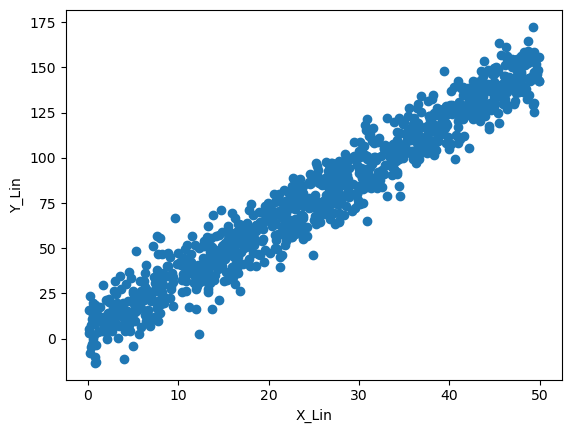

In [68]:
plt.scatter(X_Lin, Y_Lin) #builds a scatter plot and lables the axis
plt.xlabel("X_Lin")
plt.ylabel("Y_Lin")

In [57]:
#we need to split our data again
from sklearn.model_selection import train_test_split #reload our test and train
X_test_IV, X_train_IV = train_test_split (X_Lin, test_size = 0.3,random_state = 1) #80/30 split, randomize with seed 1
Y_test_IV, Y_train_IV = train_test_split (Y_Lin, test_size = 0.3,random_state = 1) #80/30 split, randomize with seed 1

In [58]:
import sklearn.linear_model as slm #imports the linear regression modle itself
lin_reg = slm.LinearRegression()
lin_reg.fit(X_train_IV, Y_train_IV) #fit to X and y #builds our fit, this builds our modle

LinearRegression()

In [59]:
Y_Predict_IV = lin_reg.predict(X_test_IV)

In [63]:
#we now want to test our modle's accuracy, therefore, we will program a chi squared goodness of fit test
def Chi_test (Test,Predict):
    Top_list = list ()
    for k in np.arange(len(Test)):
        T = ((Test[k] - Predict[k])**2)/ Predict[k]
        Top_list.append (T)
    return (sum(Top_list))

In [64]:
print(f"our chi squared value is {Chi_test(Y_test_IV,Y_Predict_IV)}, for 699 degrees of freedom and an alpha value of 0.05 our critical value is 762. Therefore our modle fails")

our chi squared value is [1678.62117191], for 699 degrees of freedom and an alpha value of 0.05 our critical value is 762. Therefore our modle fails


Text(0.5, 1.0, 'Graphed Data')

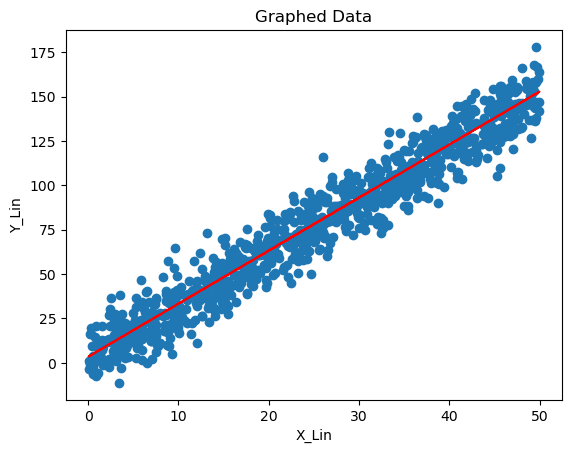

In [66]:
plt.scatter(X_Lin, Y_Lin) #builds a scatter plot and lables the axis
plt.plot (X_test_IV,Y_Predict_IV, "r") #shows our line of best fit made by our modle
plt.xlabel("X_Lin")
plt.ylabel("Y_Lin")
plt.title ("Graphed Data")

# More Data Manipulation
before we finish with this data set, we will prefrom standardization and normilziation on it in order to see the effect on the efficacy of on ML programme. 

In [68]:
#first we will scale our data from 0 to 1
from sklearn.preprocessing import MinMaxScaler #import

min_max = MinMaxScaler()  #initalize, you can min max to different sizes, this is especially usefull for graphic presentation

X_Lin = min_max.fit_transform(X_Lin) 
Y_Lin = min_max.fit_transform(Y_Lin) 

In [69]:
print (f" the maximum value of the x data is {X_Lin.max()}")
print (f" The minimum value of the x data is {X_Lin.min ()}")

print (f" the maximum value of the y data is {Y_Lin.max()}")
print (f" The minimum value of the y data is {Y_Lin.min ()}")

 the maximum value of the x data is 1.0
 The minimum value of the x data is 0.0
 the maximum value of the y data is 1.0
 The minimum value of the y data is 0.0


In [70]:
#we can also standardize our data
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() #standardization sets the mean to be zero and the verance to be one

X_Lin = scaler.fit_transform(X_Lin) 
Y_Lin = scaler.fit_transform(Y_Lin)

In [71]:
#we can use these commands to get information on our x and y data
print (f" the mean value of the x data is {X_Lin.mean()}") #very close to zero
print (f" The standard deviation value of the x data is {X_Lin.std ()}")

print (f" the mean value of the y data is {Y_Lin.mean()}")
print (f" The standard deviation value of the y data is {Y_Lin.std ()}")

 the mean value of the x data is 1.829647544582258e-16
 The standard deviation value of the x data is 0.9999999999999999
 the mean value of the y data is 2.7355895326763857e-16
 The standard deviation value of the y data is 1.0


In [72]:
#we can now reload our data
X_Lin = 50*np.random.rand(1000,1)   #build many X inputs?
Y_Lin = X_Lin*3 +2 +np.random.randn(1000, 1)*10 #this theid term adds noise to our data

In [73]:
#we can use these commands to get information on our x and y data
print (f" the mean value of the x data is {X_Lin.mean()}") #very close to zero
print (f" The standard deviation value of the x data is {X_Lin.std ()}")
print (f" the maximum value of the x data is {X_Lin.max()}")
print (f" The minimum value of the x data is {X_Lin.min ()}")

print (f" the mean value of the y data is {Y_Lin.mean()}")
print (f" The standard deviation value of the y data is {Y_Lin.std ()}")
print (f" the maximum value of the y data is {Y_Lin.max()}")
print (f" The minimum value of the y data is {Y_Lin.min ()}")

 the mean value of the x data is 24.672249970125783
 The standard deviation value of the x data is 14.754210721183227
 the maximum value of the x data is 49.9578378234575
 The minimum value of the x data is 0.0026253126220954215
 the mean value of the y data is 75.99136024160343
 The standard deviation value of the y data is 45.5962146535038
 the maximum value of the y data is 175.61188026534137
 The minimum value of the y data is -18.4484871280897


# Continuous  Data Round Two
We can now move onto our second example of a continuous data set which focuses on messuring the expected life time of a muon.

In [74]:
df_M = pd.read_csv ("Muon_csv_data")
df_M

,Unnamed: 0,numbers,Muon_Decay_Time
0,0,1,2540.0
1,1,1,900.0
2,2,1,140.0
3,3,1,2380.0
4,4,1,2000.0
...,...,...,...
398,398,1,3880.0
399,399,1,80.0
400,400,1,320.0
401,401,1,340.0


In [75]:
#now delete all but the decay time column
del df_M["numbers"]
del df_M["Unnamed: 0"]

In [76]:
df_M

,Muon_Decay_Time
0,2540.0
1,900.0
2,140.0
3,2380.0
4,2000.0
...,...
398,3880.0
399,80.0
400,320.0
401,340.0


array([[<Axes: title={'center': 'Muon_Decay_Time'}>]], dtype=object)

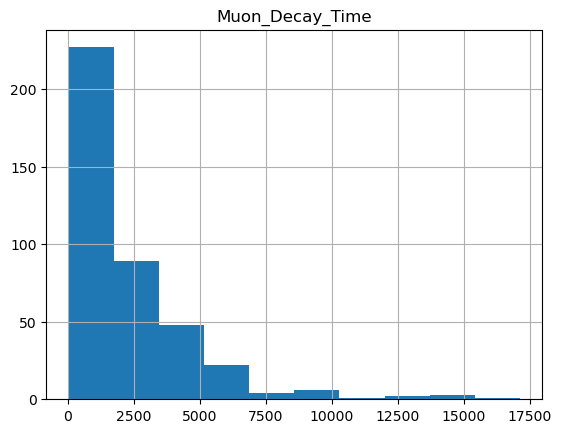

In [77]:
df_M.hist(column = 'Muon_Decay_Time')

In [81]:
#we will now use cut to make diffrent sized boxes for our histrogramme
Muon = pd.cut (df_M["Muon_Decay_Time"],20, precision = 1)
Muon.unique ()

[(1748.0, 2602.0], (894.0, 1748.0], (22.9, 894.0], (3456.0, 4310.0], (6018.0, 6872.0], ..., (7726.0, 8580.0], (14558.0, 15412.0], (13704.0, 14558.0], (9434.0, 10288.0], (10288.0, 11142.0]]
Length: 17
Categories (20, interval[float64, right]): [(22.9, 894.0] < (894.0, 1748.0] < (1748.0, 2602.0] < (2602.0, 3456.0] ... (13704.0, 14558.0] < (14558.0, 15412.0] < (15412.0, 16266.0] < (16266.0, 17120.0]]

In [80]:
Muon.value_counts ()

Muon_Decay_Time
(22.9, 894.0]         134
(894.0, 1748.0]        93
(1748.0, 2602.0]       57
(2602.0, 3456.0]       32
(3456.0, 4310.0]       30
(4310.0, 5164.0]       18
(5164.0, 6018.0]       11
(6018.0, 6872.0]       11
(8580.0, 9434.0]        4
(7726.0, 8580.0]        2
(6872.0, 7726.0]        2
(9434.0, 10288.0]       2
(12850.0, 13704.0]      2
(14558.0, 15412.0]      2
(10288.0, 11142.0]      1
(13704.0, 14558.0]      1
(16266.0, 17120.0]      1
(11142.0, 11996.0]      0
(11996.0, 12850.0]      0
(15412.0, 16266.0]      0
Name: count, dtype: int64

In [82]:
count = [134,93,57,32,30,18,11,11,4,2,2,2,2,2,1,1,1,0,0,0]#lists
time = [894,1748,2602,3456,4310,5164,6018,6872,9434,8580,7726,10288,13704,15412,11142,14558,17120,11996,12850,16266]
DF_H_Dict = {'number_of_occurances' : count, 'time_of_occurance' : time}
#DF_H = pd.DataFrame (count, columns = ['number_of_occurances'] )
DF_H = pd.DataFrame (DF_H_Dict)
type (DF_H)
DF_H

,number_of_occurances,time_of_occurance
0,134,894
1,93,1748
2,57,2602
3,32,3456
4,30,4310
5,18,5164
6,11,6018
7,11,6872
8,4,9434
9,2,8580


In [83]:
#As we saw this is exponental data, to apply linear regression we must linearize it
ln_count = [4.898,4.533,4.043, 3.466, 3.401, 2.89,2.398,2.398,1.386,0.693,0.693,0.693,0.693,0.693,0,0,0]
#len (ln_count) #we drop the last few values 

In [84]:
#we wish to add the ln values to our data frame, to do so we must have the series all be the same length
DF_H = DF_H.drop(19) #these values create errors becasue of the ln of zero
DF_H =DF_H.drop(18)
DF_H = DF_H.drop (17)
DF_H["ln_count"] = ln_count
#now we can remove the un-lned column now
del DF_H["number_of_occurances"]
DF_H

,time_of_occurance,ln_count
0,894,4.898
1,1748,4.533
2,2602,4.043
3,3456,3.466
4,4310,3.401
5,5164,2.890
6,6018,2.398
7,6872,2.398
8,9434,1.386
9,8580,0.693


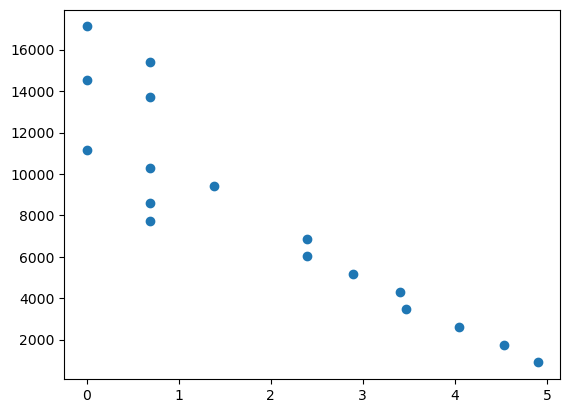

In [85]:
plt.scatter (DF_H["ln_count"], DF_H["time_of_occurance"])

In [86]:
#we can see the data is far more linear now but there is some overlap so we may drop some of the data
DF_H =DF_H.drop(16)
DF_H =DF_H.drop(15)
DF_H =DF_H.drop(13)
DF_H =DF_H.drop(12)
DF_H =DF_H.drop(10)
DF_H =DF_H.drop(9)

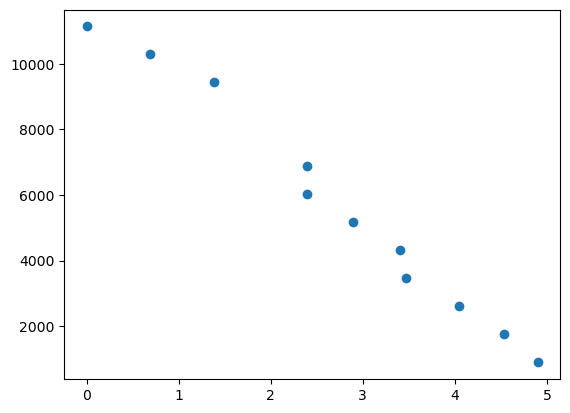

In [87]:
plt.scatter (DF_H["ln_count"], DF_H["time_of_occurance"])

In [88]:
DF_H.reset_index (inplace = True, drop = True)
DF_H

,time_of_occurance,ln_count
0,894,4.898
1,1748,4.533
2,2602,4.043
3,3456,3.466
4,4310,3.401
5,5164,2.890
6,6018,2.398
7,6872,2.398
8,9434,1.386
9,10288,0.693


In [89]:
X_V = DF_H["time_of_occurance"]
Y_V = DF_H["ln_count"]

In [91]:
#we need to split our data again
X_test_V, X_train_V = train_test_split (X_V, test_size = 0.3,random_state = 1) #80/30 split, randomize with seed 1
Y_test_V, Y_train_V = train_test_split (Y_V, test_size = 0.3,random_state = 1) #80/30 split, randomize with seed 1

In [92]:
X_train_V = X_train_V.to_numpy () #this step and the next is sometimes nessassary to get linear Regression to work
Y_train_V = Y_train_V.to_numpy()
X_test_V = X_test_V.to_numpy ()
Y_test_V = Y_test_V.to_numpy()

In [93]:
X_train_V = X_train_V.reshape (-1,1)
Y_train_V = Y_train_V.reshape (-1,1)
X_test_V = X_test_V.reshape (-1,1)
Y_test_V = Y_test_V.reshape (-1,1)

In [94]:
import sklearn.linear_model as slm #imports the linear regression modle itself
lin_reg = slm.LinearRegression()
lin_reg.fit(X_train_V, Y_train_V) #fit to X and y #builds our fit, this builds our modle

LinearRegression()

In [95]:
Y_Predict_V = lin_reg.predict(X_test_V)

In [96]:
print(f"our chi squared value is {Chi_test(Y_test_V,Y_Predict_V)}, for 10 degrees of freedom and an alpha value of 0.05 our critical value is 18.3. Therefore our modle passes")

our chi squared value is [0.47529882], for 10 degrees of freedom and an alpha value of 0.05 our critical value is 18.3. Therefore our modle passes


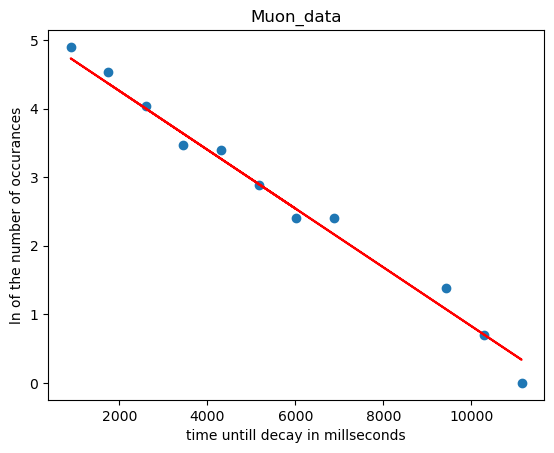

In [100]:
plt.scatter (DF_H["time_of_occurance"], DF_H["ln_count"])
plt.ylabel ('ln of the number of occurances')
plt.xlabel ('time untill decay in millseconds')
plt.plot (X_test_V, Y_Predict_V, "r") 
plt.title ('Muon_data')
plt.show ()

Copyright Note:
    
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.